In [180]:
# We need some python libaries (tools) which we typicall load in the beginning of our script

# importing numpy as np
import numpy as np
# importing pyplot as plt
import matplotlib.pyplot as plt
# improrting pandas
import pandas as pd

# importing tool to display tables
from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=False)

<IPython.core.display.Javascript object>

In [181]:
# Simulate some daily temperature data using a random number generator 

# First we have to set some paramters
years = 50 #how many years
size = 365 * years #total size of the dataset
pos = 15 # mean annual temperature
scale = 4 # standard deviation of daily temperature for simulating annual temp distribution 

# With only two statistical moments we can generate random numbers using a normal distribution
data = np.random.normal(pos, scale, size)

In [182]:
# Store data in a dataframe
df = pd.DataFrame({'day': range(1,data.size+1) , 'temperature': data})

# Print dataframe as table 
show(df)

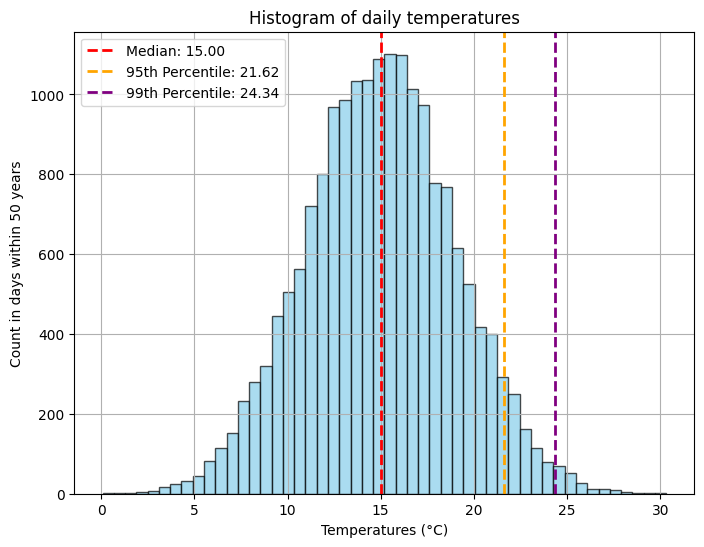

In [183]:
# Calculate some statistical moments
mean_temp = np.mean(df['temperature']) #mean
median_temp = np.median(df['temperature']) #median
percentile_95 = np.percentile(df['temperature'],95) #95% percentile
percentile_99 = np.percentile(df['temperature'],99) #99% percentile

# Plot the Histogram
plt.figure(figsize=(8, 6))
plt.hist(df['temperature'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')

# Add lines for median, and percentiles
plt.axvline(median_temp, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median_temp:.2f}')
plt.axvline(percentile_95, color='orange', linestyle='dashed', linewidth=2, label=f'95th Percentile: {percentile_95:.2f}')
plt.axvline(percentile_99, color='purple', linestyle='dashed', linewidth=2, label=f'99th Percentile: {percentile_99:.2f}')

# Plot legend, labels, and title
plt.legend()
plt.xlabel('Temperatures (°C)')
plt.ylabel('Count in days within ' + f'{years:} years')
plt.title('Histogram of daily temperatures')
plt.grid(True)
plt.show()

In [184]:
# Cumulative distribution function
# sort the data in decending order
df_sorted = df.sort_values('temperature', ascending=False)
#show(df_sorted)

rank = np.arange(1,np.size(data)+1)
df_sorted.insert(2,'rank', rank) 
#show(df_sorted)

# Calculate return period in days
return_period = 365*years/df_sorted['rank'] 

# Calaculate occurence probabilty
probability = 1 / return_period

# Add to sorted dataframe
df_sorted.insert(3,'return period', return_period) 
df_sorted.insert(4,'probability', probability) 
show(df_sorted)

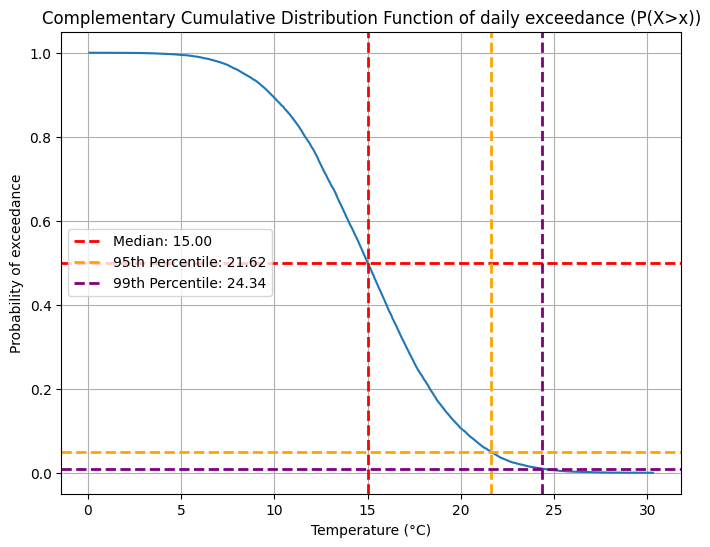

In [185]:
# Plot complementary cumulative distribution function 
plt.figure(figsize=(8, 6))
plt.plot(df_sorted['temperature'],df_sorted['probability'])
plt.axvline(median_temp, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median_temp:.2f}')
plt.axhline(1-0.5, color='red', linestyle='dashed', linewidth=2)
plt.axvline(percentile_95, color='orange', linestyle='dashed', linewidth=2, label=f'95th Percentile: {percentile_95:.2f}')
plt.axhline(1-0.95, color='orange', linestyle='dashed', linewidth=2)
plt.axvline(percentile_99, color='purple', linestyle='dashed', linewidth=2, label=f'99th Percentile: {percentile_99:.2f}')
plt.axhline(1-0.99, color='purple', linestyle='dashed', linewidth=2)

# Plot legend, labels, and title
plt.legend()
plt.xlabel('Temperature (°C)')
plt.ylabel('Probability of exceedance')
plt.title('Complementary Cumulative Distribution Function of daily exceedance (P(X>x))')
plt.grid(True)
plt.show()

In [186]:
# From daily to annual propability of annual exceedance
probability_annual_excendance = 1-(1-df_sorted['probability'])**365

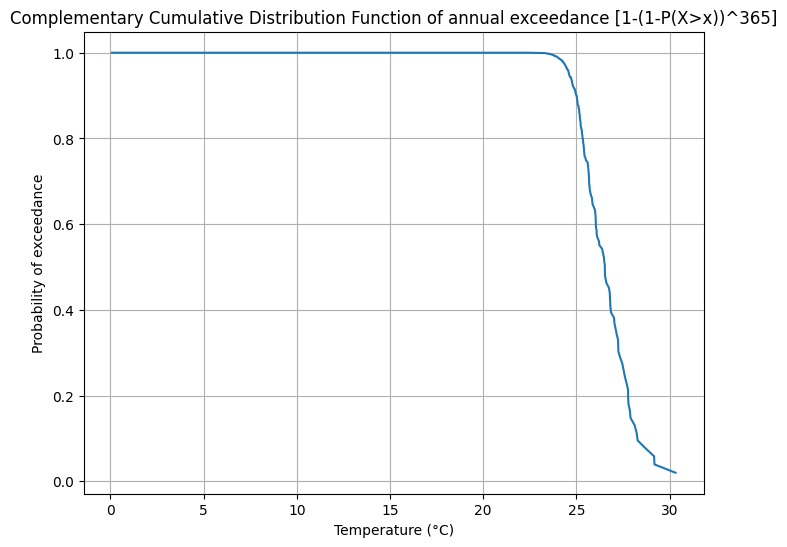

In [187]:
# Plot complementary cumulative distribution function 
plt.figure(figsize=(8, 6))
plt.plot(df_sorted['temperature'],probability_annual_excendance)

# Plot legend, labels, and title
plt.xlabel('Temperature (°C)')
plt.ylabel('Probability of exceedance')
plt.title('Complementary Cumulative Distribution Function of annual exceedance [1-(1-P(X>x))^365]')
plt.grid(True)
plt.show()